In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np


def read_json_files(folder_path):
    all_data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r') as f:
                        data = json.load(f)
                        all_data.append(data)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    return all_data


def summarize_data(all_data):
    all_times = {}
    total_processing_times = []
    for data in all_data:
        for key, value in data.items():
            if key not in all_times:
                all_times[key] = []
            all_times[key].append(value)
        total_processing_times.append(data.get('total_processing', 0))
    average_times = {key: np.mean(values) for key, values in all_times.items()}
    most_time_consuming = max(average_times, key=average_times.get)
    average_total_processing = np.mean(total_processing_times)
    return average_times, most_time_consuming, average_total_processing


def visualize_data(average_times):
    labels = list(average_times.keys())
    times = list(average_times.values())
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times)
    plt.xlabel('Process Steps')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Process Step')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
   

In [4]:
def read_json_files(folder_path):
    all_data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r') as f:
                        data = json.load(f)
                        all_data.append(data)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    return all_data


def merge_bin_data(data):
    merged = {}
    for key, value in data.items():
        if key.startswith('bin_'):
            parts = key.split('_')
            new_key = '_'.join(parts[2:])
            if new_key not in merged:
                merged[new_key] = 0
            merged[new_key] += value
        else:
            merged[key] = value
    return merged


def summarize_data(all_data):
    all_times = {}
    total_processing_times = []
    for data in all_data:
        merged_data = merge_bin_data(data)
        for key, value in merged_data.items():
            if key not in all_times:
                all_times[key] = []
            all_times[key].append(value)
        total_processing_times.append(merged_data.get('total_processing', 0))
    average_times = {key: np.mean(values) for key, values in all_times.items()}
    most_time_consuming = max(average_times, key=average_times.get)
    average_total_processing = np.mean(total_processing_times)
    return average_times, most_time_consuming, average_total_processing


def visualize_data(average_times):
    labels = list(average_times.keys())
    times = list(average_times.values())
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times)
    plt.xlabel('Process Steps')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Process Step')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Error reading /home/qinllgroup/hongxiangyu/git_project/livo2-data-utils/10-Mesh-acc/data/tree_01/depth_mesh/stack_acc_10_1/time_json/00016_time_stats.json: Expecting value: line 1 column 1 (char 0)
Most time-consuming part: total_processing with average time 34.924584245681764 s
Average total processing time: 34.924584245681764 s


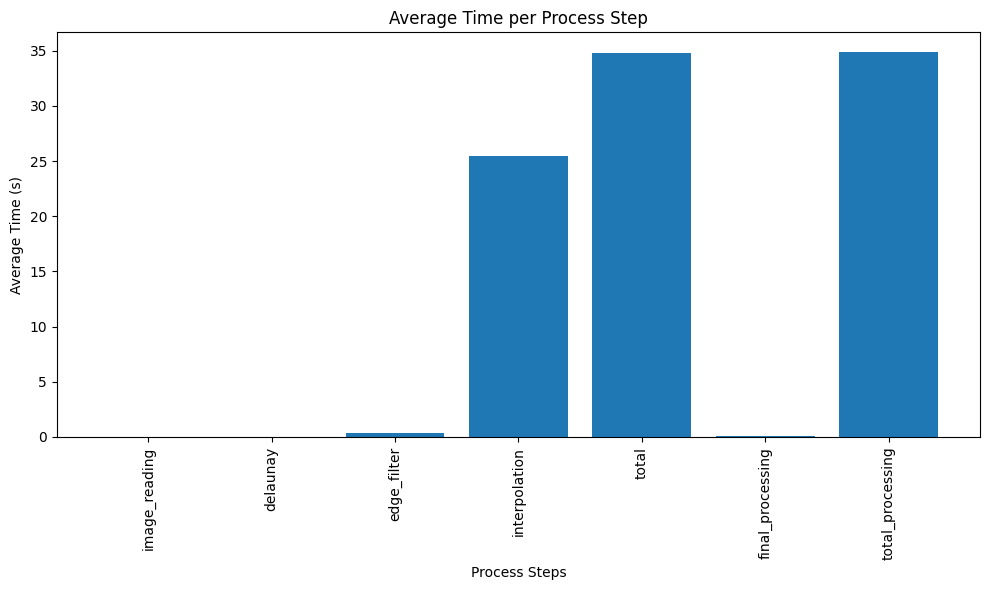

In [11]:
folder_path = '/home/qinllgroup/hongxiangyu/git_project/livo2-data-utils/10-Mesh-acc/data/tree_01/depth_mesh/stack_acc_10_1'  # 请替换为实际的文件夹路径
all_data = read_json_files(folder_path)
average_times, most_time_consuming, average_total_processing = summarize_data(all_data)
print(f"Most time-consuming part: {most_time_consuming} with average time {average_times[most_time_consuming]} s")
print(f"Average total processing time: {average_total_processing} s")
visualize_data(average_times)

In [1]:
import numpy as np

num_bins = 2
dmin = 1
dmax = 10
edges = np.linspace(dmin, dmax, num_bins + 1)
edges

array([ 1. ,  5.5, 10. ])